In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from fun_lib import *

In [2]:
bp = 10
m, n = 4, 8
T = 0*np.pi/180
delta = 0*np.pi/180
c_r, c_t = 3, 3
U_i = 100
rho = 1.0
dt = 0.1
alpha = 5*np.pi/180

In [3]:
X,PC = wing_panels(bp, T, delta, c_r, c_t, m, n)
XV = steady_wing_vortex_panels(X,U_i,dt,alpha)

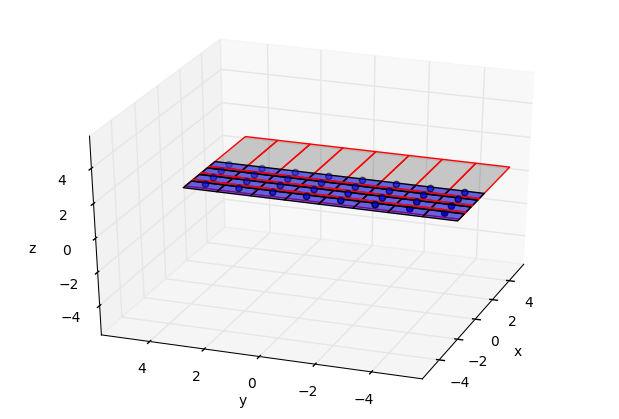

In [4]:
ax = plot_panels(X,transp=0.5,elev=30,azim=-160)
plot_panels(XV,ax=ax,edge_color='r',fill_color=0)
plot_control_points(PC,ax);

In [5]:
def net_panel_circulation(X,PC,U_i,alpha):
    m, n = X.shape[:2]
    aic = wing_influence_matrix(X,PC) + wake_contrib_to_wing_influence_matrix(X,PC,alpha)
    rhs = steady_rhs(X,alpha,U_i)
    g = np.linalg.solve(aic,rhs).reshape(m,n)
    
    net_g = np.empty_like(g)
    net_g[0,:] = g[0,:]
    net_g[1:,:] = g[1:,:] - g[:-1,:]
    return net_g

In [6]:
net_g = net_panel_circulation(X,PC,U_i,alpha)

In [7]:
import mpl_toolkits.mplot3d as a3
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

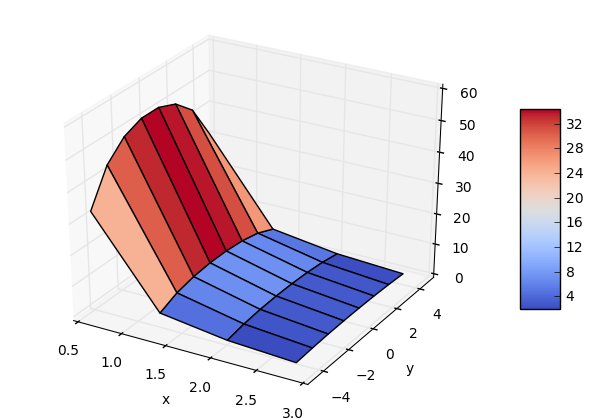

In [24]:
fig = plt.figure()
ax = a3.Axes3D(fig)
surf = ax.plot_surface(PC[:,:,0],PC[:,:,1],net_g,cmap=cm.coolwarm,
                       antialiased=True,shade=False,
                       cstride=1, rstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(surf, shrink=0.5, aspect=5);